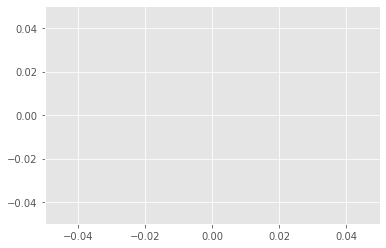

In [70]:
import json
import math
from matplotlib import pyplot as plt
from collections import Counter
plt.style.use('ggplot')

In [51]:
def read_in(filename):
    tmp = Counter()
    with open(filename) as f:
        for line in f:
            instance = json.loads(line)

            for k,v in instance['labels'].items():
                section_idx = k.rsplit(":",maxsplit=1)[1]
                section_label = v['section_label']

                tmp[(int(section_idx), section_label)] += 1
    return tmp

def normalize(dist):
    return [a/sum(dist) for a in dist]

def D_kl(p,q):
    return sum(pi*math.log(pi/qi,2) for pi,qi in zip(p,q))
    

In [39]:
labels = Counter()

labels.update(read_in("ncmace95/train.jsonl"))
labels.update(read_in("ncmace95/dev.jsonl"))
labels.update(read_in("ncmace95/test.jsonl"))


pos = []
val = []
for idx in range(16):
    print(labels[(idx,'neutral')],labels[(idx,'true')],labels[(idx,'false')])
    pos.append(idx)
    val.append([labels[(idx,'neutral')],labels[(idx,'true')],labels[(idx,'false')]])
    

2918 4632 2345
4392 2358 1229
4412 1878 853
4311 1628 727
3930 1287 588
3548 986 460
3027 904 371
2743 682 289
2316 608 236
1948 436 217
1665 333 173
1236 287 112
967 177 73
700 144 52
476 72 38
191 30 14


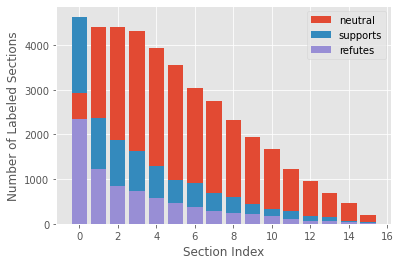

In [120]:
colors = ["C0","C1","C2"]
items = ["neutral","supports","refutes"]
heights_a, heights_b, heights_c = list(zip(*val))
for x, ha, hb, hc in zip(pos, heights_a, heights_b, heights_c):
    for i, (h, c, l) in enumerate(sorted(zip([ha, hb, hc], colors, items))):
        plt.bar(x, h, color=c, zorder=-i+10,label=l)

plt.legend(items)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.xlabel("Section Index")
plt.ylabel("Number of Labeled Sections")
plt.savefig("bias_section_distribution.pdf",bbox_inches='tight')

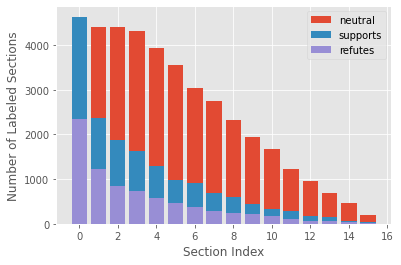

In [107]:
for idx, series in enumerate(zip(*val)):
    plt.bar(pos,series)
    
plt.legend(["neutral","supports","refutes"])

plt.xlabel("Section Index")
plt.ylabel("Number of Labeled Sections")
plt.savefig("bias_section_distribution.pdf",bbox_inches='tight')

In [73]:
master_distribution = [0,0,0]

for idx,dist in zip(pos,val):
    master_distribution[0] += dist[0]
    master_distribution[1] += dist[1]
    master_distribution[2] += dist[2]
    
norm_ms = [a/sum(master_distribution) for a in master_distribution]
norm_ms

[0.615565326433753, 0.2609882696550739, 0.12344640391117319]

In [74]:
infos = []
for idx,dist in zip(pos,val):
    print(normalize(dist))
    infos.append(D_kl(norm_ms,normalize(dist)))

[0.29489641232945935, 0.46811520970186965, 0.23698837796867103]
[0.5504449179095124, 0.2955257551071563, 0.15402932698333124]
[0.6176676466470671, 0.2629147417051659, 0.11941761164776704]
[0.6467146714671467, 0.24422442244224424, 0.10906090609060906]
[0.6770025839793282, 0.22170542635658916, 0.10129198966408269]
[0.7104525430516619, 0.197436924309171, 0.092110532639167]
[0.703626220362622, 0.2101348210134821, 0.08623895862389586]
[0.7385568120624664, 0.1836295099623048, 0.07781367797522887]
[0.7329113924050633, 0.19240506329113924, 0.07468354430379746]
[0.7489427143406382, 0.16762783544790466, 0.08342945021145713]
[0.7669276830953478, 0.15338553661906956, 0.07968678028558268]
[0.7559633027522936, 0.17553516819571865, 0.06850152905198777]
[0.7945768282662284, 0.14543960558751026, 0.0599835661462613]
[0.78125, 0.16071428571428573, 0.05803571428571429]
[0.8122866894197952, 0.12286689419795221, 0.06484641638225255]
[0.8127659574468085, 0.1276595744680851, 0.059574468085106386]


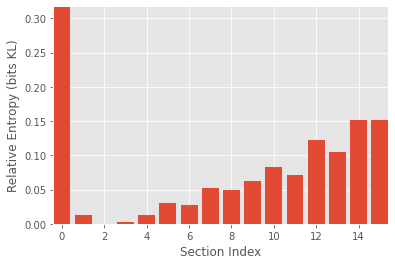

In [86]:
plt.bar(pos,infos)

plt.autoscale(tight=True)

plt.xlabel("Section Index")
plt.ylabel("Relative Entropy (bits KL)")
plt.savefig("bias_section_relative_entropy.pdf",bbox_inches='tight')